Import libraries for analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import the cleaned data set for analysis.

In [2]:
person1 = pd.read_csv('person1_clean.csv')
person2 = pd.read_csv('person2_clean.csv')

Sort the data frame by sources first, then by date, then by hour.
The reason for this step is so that the data frame is easier to view in terms of source because the purpose of this analysis is to determine the step count by the source type. 

In [3]:
person1.sort_values(by=['Source', 'Date', 'Hour'])
person2.sort_values(by=['Source', 'Date', 'Hour'])

,Unnamed: 0,Source,Date,Hour,Count
0,0,Person2 Phone,2014-11-29,6,6
1,1,Person2 Phone,2014-11-29,6,4
2,2,Person2 Phone,2014-11-29,6,3
3,3,Person2 Phone,2014-11-29,6,9
4,4,Person2 Phone,2014-11-29,6,6
...,...,...,...,...,...
486252,486252,Person2 Watch,2021-09-22,13,47
486253,486253,Person2 Watch,2021-09-22,13,13
486254,486254,Person2 Watch,2021-09-22,14,71
486257,486257,Person2 Watch,2021-09-22,15,32


Convert all the dates into the date-time format because the plots below are time-series plots.

In [4]:
person1['Date'] = pd.to_datetime(person1['Date'])
person2['Date'] = pd.to_datetime(person2['Date'])

Remove the 'Person1' and whitespace from all the source names.

In [5]:
person1['Source'] = person1['Source'].str[8:]
person1['Source'] = person1['Source'].str.strip()

These next lines of code is to determine what sources person 1 and person 2 has in their respective data frames.

In [6]:
print('Person 1 Sources')
for x in person1['Source'].unique():
    print(x)
print("")
print('Person 2 Sources')
for y in person2['Source'].unique():
    print(y)

Person 1 Sources
iPhone SE
Mi Fit
Misfit
Health Mate
Apple Watch

Person 2 Sources
Person2 Phone
Person2 Watch


Separating the person1 data frames into data frames that only contain the unique sources. 

In [7]:
iphone = person1[person1['Source'] == 'iPhone SE']
mifit = person1[person1['Source'] == 'Mi Fit']
misfit = person1[person1['Source'] == 'Misfit']
healthmate = person1[person1['Source'] == 'Health Mate']
applewatch = person1[person1['Source'] == 'Apple Watch']

Count the number of rows each source has.

In [8]:
person1['Source'].value_counts()

iPhone SE      132843
Health Mate     26848
Apple Watch     20000
Misfit           3404
Mi Fit            692
Name: Source, dtype: int64

Create an aggregate data frame that lists the sum of step counts by the source type, and the day.

In [9]:
source = person1.groupby(['Source','Date','Hour']).sum()
source_list = source.reset_index()
source_list

,Source,Date,Hour,Unnamed: 0,Count
0,Apple Watch,2021-03-13,13,641918,94
1,Apple Watch,2021-03-13,14,4333365,2358
2,Apple Watch,2021-03-13,15,963069,698
3,Apple Watch,2021-03-13,16,1123626,358
4,Apple Watch,2021-03-13,17,481569,63
...,...,...,...,...,...
22437,iPhone SE,2021-09-22,10,367533,862
22438,iPhone SE,2021-09-22,12,367537,144
22439,iPhone SE,2021-09-22,13,367541,119
22440,iPhone SE,2021-09-22,17,1102683,3560


Plotting the step count for all the iPhone SE data for person 1. 
Also printing the min and max step count collected by the iphone SE for person 1, and the dates which those min and max step counts occur.
Calculate the start date for device data recording and end date for device data recording.

Minimum steps:
 Unnamed: 0                      2
Source                  iPhone SE
Date          2014-12-07 00:00:00
Hour                            8
Count                           1
Name: 2, dtype: object

Maximum steps: 
 Unnamed: 0                 115549
Source                  iPhone SE
Date          2018-11-08 00:00:00
Hour                            3
Count                       88359
Name: 115549, dtype: object


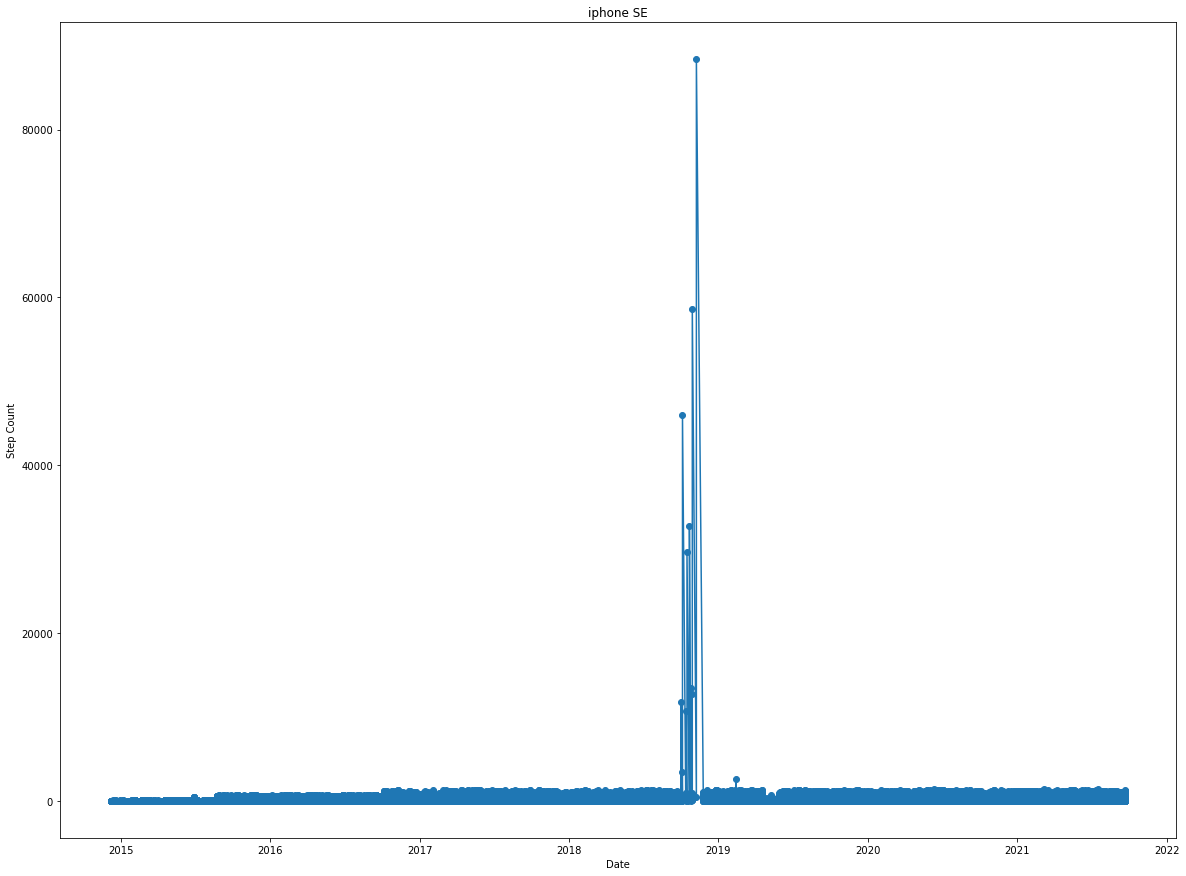

In [10]:
date = iphone['Date']
count = iphone['Count']
plt.rcParams["figure.figsize"] = (20,15)
plt.plot_date(date, count, linestyle='solid')
plt.title('iphone SE')
plt.xlabel('Date')
plt.ylabel('Step Count')
print('Minimum steps:\n', iphone.loc[iphone['Count'].idxmin()])
print('\nMaximum steps: \n', iphone.loc[iphone['Count'].idxmax()])

mindate_iphone = min(iphone['Date'])
mindate_iphone = pd.to_datetime(mindate_iphone).date()
maxdate_iphone = max(iphone['Date'])
maxdate_iphone = pd.to_datetime(maxdate_iphone).date()

Plotting the step count for all the Mi Fit data for person 1. 
Also printing the min and max step count collected by the Mi Fit for person 1, and the dates which those min and max step counts occur.
Calculate the start date for device data recording and end date for device data recording.

Minimum steps:
 Unnamed: 0                 112427
Source                     Mi Fit
Date          2018-04-15 00:00:00
Hour                           14
Count                           9
Name: 112427, dtype: object

Maximum steps: 
 Unnamed: 0                  98583
Source                     Mi Fit
Date          2016-03-13 00:00:00
Hour                           15
Count                        5288
Name: 98583, dtype: object


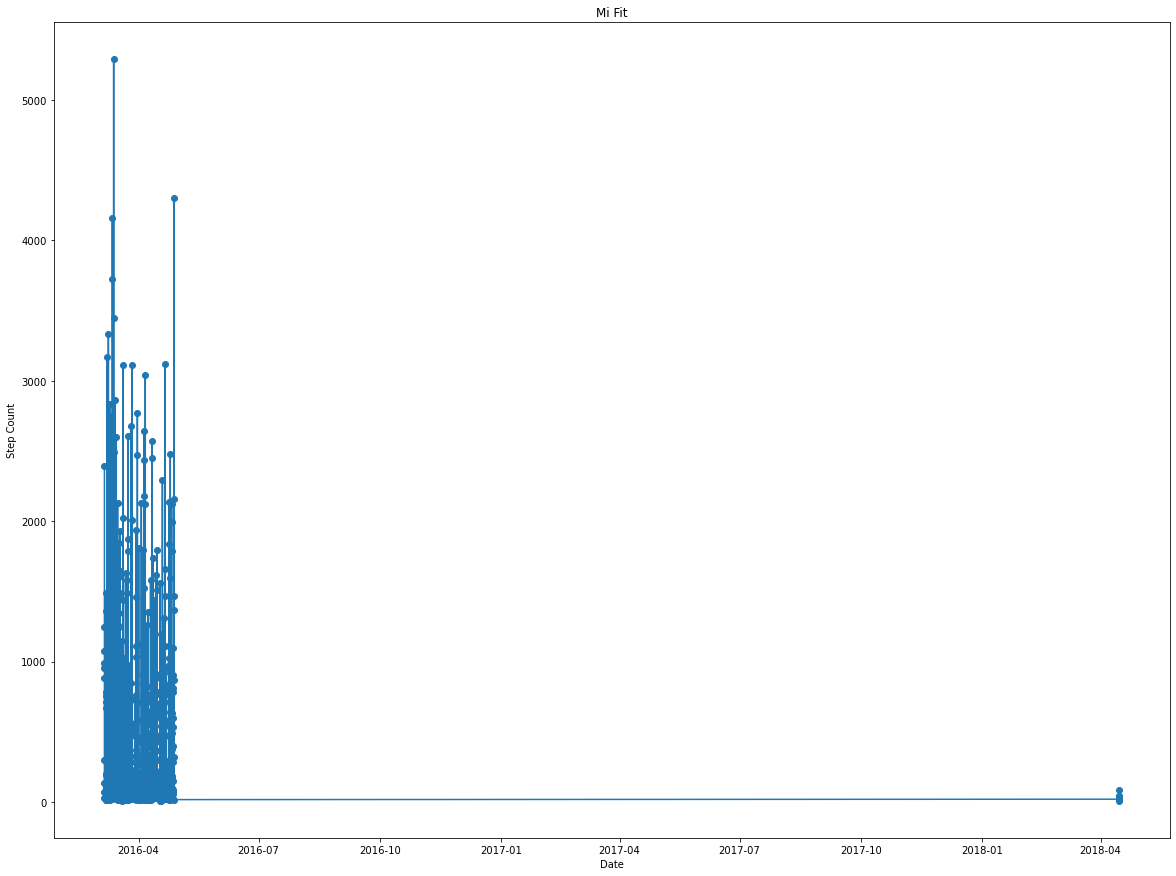

In [11]:
date = mifit['Date']
count = mifit['Count']
plt.rcParams["figure.figsize"] = (20,15)
plt.plot_date(date, count, linestyle='solid')
plt.title('Mi Fit')
plt.xlabel('Date')
plt.ylabel('Step Count')
print('Minimum steps:\n', mifit.loc[mifit['Count'].idxmin()])
print('\nMaximum steps: \n', mifit.loc[mifit['Count'].idxmax()])

mindate_mifit = min(mifit['Date'])
mindate_mifit = pd.to_datetime(mindate_mifit).date()
maxdate_mifit = max(mifit['Date'])
maxdate_mifit = pd.to_datetime(maxdate_mifit).date()

Plotting the step count for all the MisFit data for person 1. 
Also printing the min and max step count collected by the MisFit for person 1, and the dates which those min and max step counts occur.
Calculate the start date for device data recording and end date for device data recording.

Minimum steps:
 Unnamed: 0                 115414
Source                     Misfit
Date          2018-11-15 00:00:00
Hour                            7
Count                           2
Name: 115414, dtype: object

Maximum steps: 
 Unnamed: 0                 116478
Source                     Misfit
Date          2018-12-27 00:00:00
Hour                            7
Count                        7138
Name: 116478, dtype: object


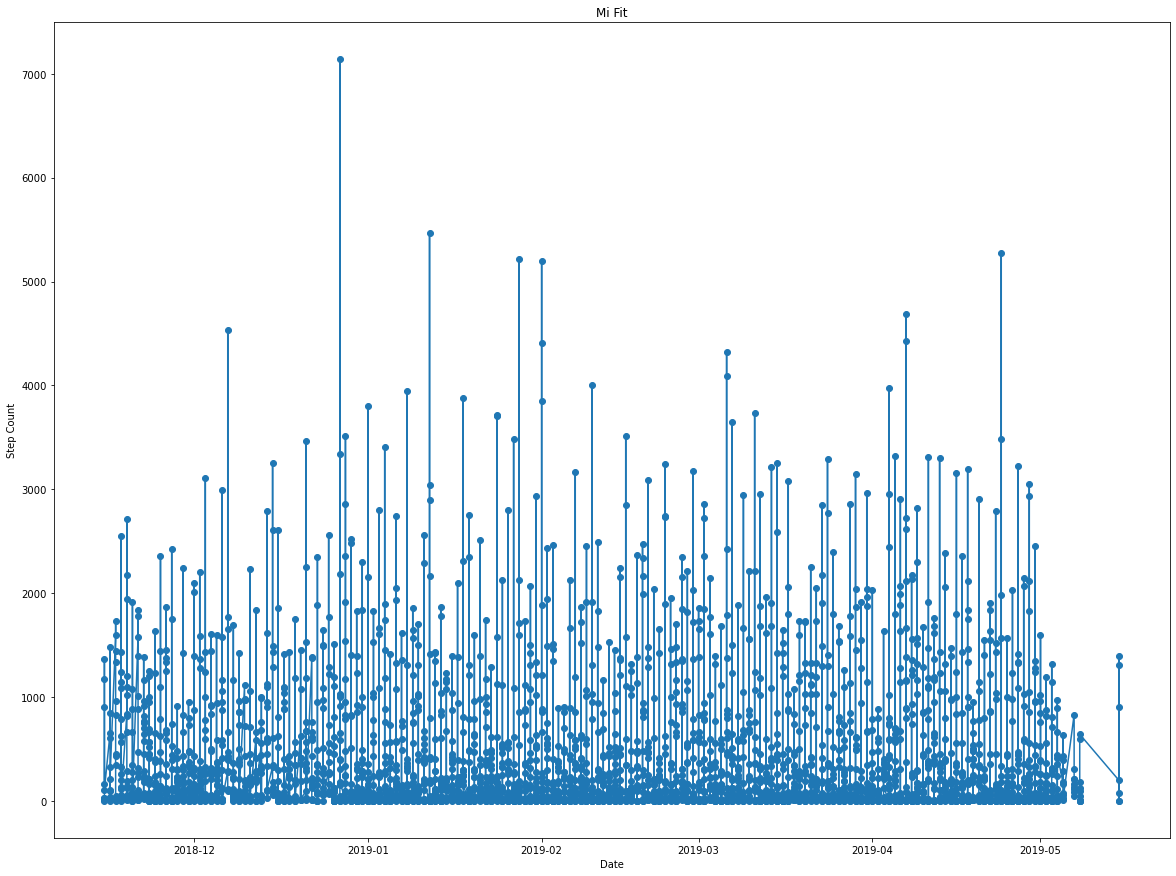

In [12]:
date = misfit['Date']
count = misfit['Count']
plt.rcParams["figure.figsize"] = (20,15)
plt.plot_date(date, count, linestyle='solid')
plt.title('Mi Fit')
plt.xlabel('Date')
plt.ylabel('Step Count')
print('Minimum steps:\n', misfit.loc[misfit['Count'].idxmin()])
print('\nMaximum steps: \n', misfit.loc[misfit['Count'].idxmax()])

mindate_misfit = min(misfit['Date'])
mindate_misfit = pd.to_datetime(mindate_misfit).date()
maxdate_misfit = max(misfit['Date'])
maxdate_misfit = pd.to_datetime(maxdate_misfit).date()

Plotting the step count for all the Health Mate data for person 1. 
Also printing the min and max step count collected by the Health Mate for person 1, and the dates which those min and max step counts occur.
Calculate the start date for device data recording and end date for device data recording.

Minimum steps:
 Unnamed: 0                 125935
Source                Health Mate
Date          2017-10-08 00:00:00
Hour                           10
Count                           2
Name: 125935, dtype: object

Maximum steps: 
 Unnamed: 0                 125778
Source                Health Mate
Date          2015-05-22 00:00:00
Hour                            0
Count                         239
Name: 125778, dtype: object


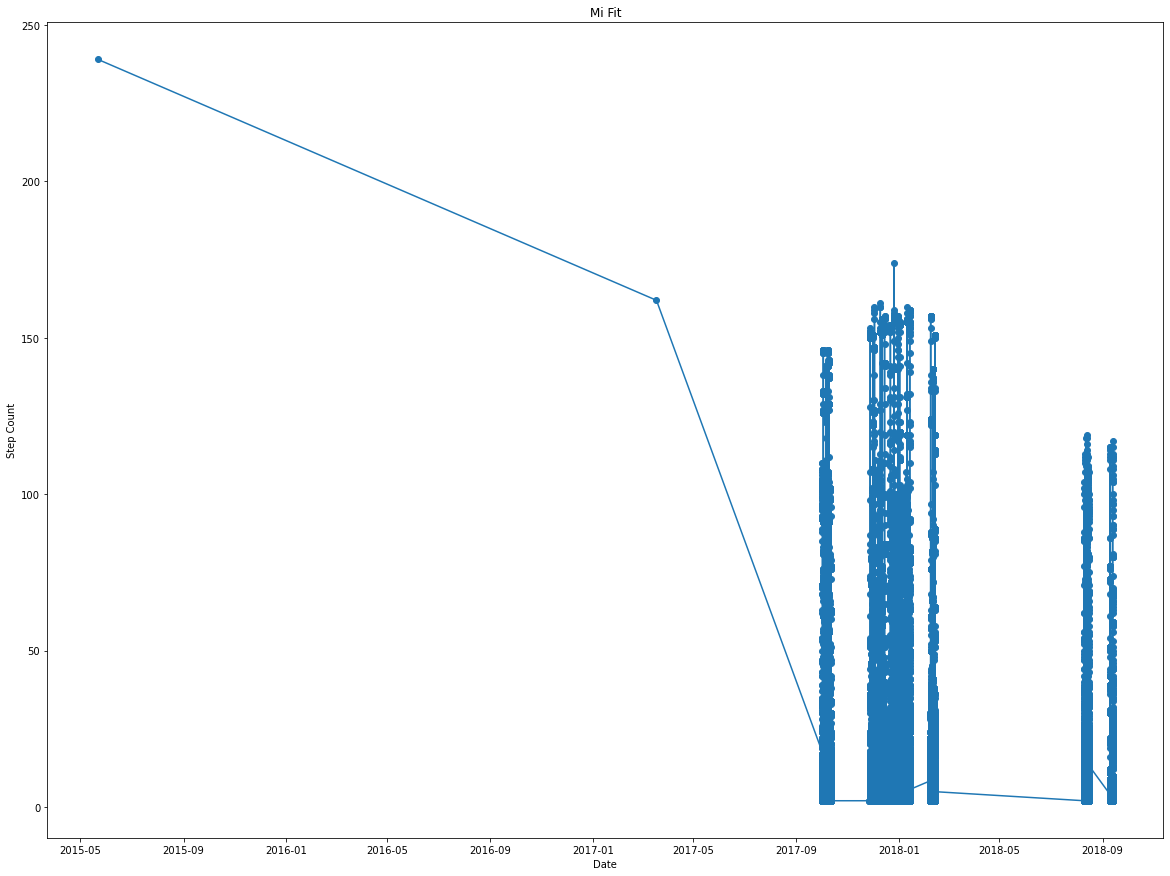

In [13]:
date = healthmate['Date']
count = healthmate['Count']
plt.rcParams["figure.figsize"] = (20,15)
plt.plot_date(date, count, linestyle='solid')
plt.title('Mi Fit')
plt.xlabel('Date')
plt.ylabel('Step Count')
print('Minimum steps:\n', healthmate.loc[healthmate['Count'].idxmin()])
print('\nMaximum steps: \n', healthmate.loc[healthmate['Count'].idxmax()])

mindate_healthmate = min(healthmate['Date'])
mindate_healthmate = pd.to_datetime(mindate_healthmate).date()
maxdate_healthmate = max(healthmate['Date'])
maxdate_healthmate = pd.to_datetime(maxdate_healthmate).date()

Print all the start dates for each device where data is recorded and the end dates for each device where data is recorded.

In [14]:
print('iPhone SE \tstart date: {}, end date {}'.format(mindate_iphone, maxdate_iphone))
print('\nHealth Mate \tstart date: {}, end date {}'.format(mindate_healthmate, maxdate_healthmate))
print('\nMiFit \t\tstart date: {}, end date {}'.format(mindate_mifit, maxdate_mifit))
print('\nMisFit \t\tstart date: {}, end date {}'.format(mindate_misfit, maxdate_misfit))

iPhone SE 	start date: 2014-12-07, end date 2021-09-22

Health Mate 	start date: 2015-05-22, end date 2018-09-13

MiFit 		start date: 2016-03-06, end date 2018-04-15

MisFit 		start date: 2018-11-15, end date 2019-05-15
